In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
stocks_fp = os.path.join('data', 'all_transactions.csv')
stocks = pd.read_csv(stocks_fp)
stocks.head()

reps_party_117_fp = os.path.join('data', 'house_members_117.csv')
reps_party117 = pd.read_csv(reps_party_117_fp)
reps_party117.head()

reps_party_116_fp = os.path.join('data', 'house_members_116.csv')
reps_party116 = pd.read_csv(reps_party_116_fp)
reps_party116.head()

,name_id,name,state,url,chamber,current_party,committee_assignments
0,A000374,ralph-abraham,Louisiana,https://www.congress.gov/member/ralph-abraham/...,House,Republican,"['Agriculture', 'Armed Services']"
1,A000370,alma-adams,North Carolina,https://www.congress.gov/member/alma-adams/A00...,House,Democratic,"['Agriculture', 'Education and Labor', 'Financ..."
2,A000055,robert-aderholt,Alabama,https://www.congress.gov/member/robert-aderhol...,House,Republican,['Appropriations']
3,A000371,pete-aguilar,California,https://www.congress.gov/member/pete-aguilar/A...,House,Democratic,"['Appropriations', 'House Administration']"
4,A000372,rick-allen,Georgia,https://www.congress.gov/member/rick-allen/A00...,House,Republican,"['Agriculture', 'Education and Labor']"


In [3]:
# stocks
# clean null vals
stocks_cleaned = stocks.replace({'--': np.NaN})

# clean representative
reps_split = stocks_cleaned['representative'].str.lower().str.split()
stocks_cleaned['representative_cleaned'] = reps_split.str[1] + ' ' + reps_split.str[-1]
stocks_cleaned.head()

# Fill in missing values for asset_description
fill_asset_descs = {'URGO': 'Urban Gro Inc', 'CELO': 'Celulosa Argentina Sociedad Anonima', 'BLL': 'Ball Corporation'}
stocks_cleaned = stocks_cleaned.set_index('ticker')
stocks_cleaned['asset_description'] = stocks_cleaned['asset_description'].fillna(value = fill_asset_descs)
stocks_cleaned = stocks_cleaned.reset_index()
stocks_cleaned.head()

,ticker,disclosure_year,disclosure_date,transaction_date,owner,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,representative_cleaned
0,BP,2021,10/04/2021,2021-09-27,joint,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,virginia foxx
1,XOM,2021,10/04/2021,2021-09-13,joint,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,virginia foxx
2,ILPT,2021,10/04/2021,2021-09-10,joint,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,virginia foxx
3,PM,2021,10/04/2021,2021-09-28,joint,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,virginia foxx
4,BLK,2021,10/04/2021,2021-09-17,self,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,alan lowenthal


In [4]:
# clean reps_party117
reps_party_117_cleaned = reps_party117[['Member', 'Party.1']]
reps_117_split = reps_party_117_cleaned['Member'].str.lower().str.split()
reps_party_117_cleaned.loc[:, 'Member'] = reps_117_split.str[0] + ' ' + reps_117_split.str[-1]
reps_party_117_cleaned = reps_party_117_cleaned.rename(columns={'Party.1': 'Party'}).set_index('Member')
reps_party_117_cleaned

C:\Users\kelvi\anaconda3\envs\dsc80\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,Party
Member,
jerry carl,Republican
barry moore,Republican
mike rogers,Republican
robert aderholt,Republican
mo brooks,Republican
...,...
scott fitzgerald,Republican
glenn grothman,Republican
tom tiffany,Republican


In [5]:
# clean reps_party116
reps_party_116_cleaned = reps_party116[['name', 'current_party']]
reps_party_116_cleaned.loc[:, 'name'] = reps_party_116_cleaned['name'].str.replace('-', ' ').str.lower()
reps_party_116_cleaned = reps_party_116_cleaned.set_index('name')
reps_party_116_cleaned.head()

C:\Users\kelvi\anaconda3\envs\dsc80\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


,current_party
name,
ralph abraham,Republican
alma adams,Democratic
robert aderholt,Republican
pete aguilar,Democratic
rick allen,Republican


In [6]:
# merge datasets
merge_parties = reps_party_116_cleaned.merge(reps_party_117_cleaned, 
                                             how='outer', 
                                             left_index=True,
                                             right_index=True).reset_index()
merge_parties = (
    merge_parties.bfill(axis=1)[['index', 'current_party']].set_index('index')
)

stocks_cleaned_test = stocks_cleaned.set_index('representative_cleaned')
merged = stocks_cleaned_test.merge(merge_parties, how='left', left_index=True, right_index=True).reset_index()
merged

,index,ticker,disclosure_year,disclosure_date,transaction_date,owner,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,current_party
0,abigail spanberger,LHX,2021,06/03/2021,2021-06-01,self,L3Harris Special Stock Grant,purchase,"$1,001 - $15,000",Hon. Abigail Spanberger,VA07,https://disclosures-clerk.house.gov/public_dis...,False,Democratic
1,abigail spanberger,NaN,2020,03/20/2020,2020-02-28,self,L3Harris Special Stock Grant,purchase,"$1,001 - $15,000",Hon. Abigail Spanberger,VA07,https://disclosures-clerk.house.gov/public_dis...,False,Democratic
2,adam kinzinger,AAL,2020,07/21/2020,2020-06-09,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Hon. Adam Kinzinger,IL16,https://disclosures-clerk.house.gov/public_dis...,False,Republican
3,adam kinzinger,AAL,2020,07/21/2020,2020-06-11,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Hon. Adam Kinzinger,IL16,https://disclosures-clerk.house.gov/public_dis...,False,Republican
4,adam kinzinger,AAL,2020,07/21/2020,2020-06-25,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Hon. Adam Kinzinger,IL16,https://disclosures-clerk.house.gov/public_dis...,False,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14175,zoe lofgren,V,2021,10/07/2021,2021-09-02,self,Visa Inc,purchase,"$1,001 - $15,000",Hon. Zoe Lofgren,CA19,https://disclosures-clerk.house.gov/public_dis...,False,Democratic
14176,zoe lofgren,WMT,2021,10/07/2021,2021-09-02,self,Walmart Inc,purchase,"$1,001 - $15,000",Hon. Zoe Lofgren,CA19,https://disclosures-clerk.house.gov/public_dis...,False,Democratic
14177,zoe lofgren,DIS,2021,10/07/2021,2021-09-02,self,Walt Disney Company,purchase,"$1,001 - $15,000",Hon. Zoe Lofgren,CA19,https://disclosures-clerk.house.gov/public_dis...,False,Democratic
14178,zoe lofgren,ZTS,2021,10/07/2021,2021-09-02,self,Zoetis Inc Class A,purchase,"$1,001 - $15,000",Hon. Zoe Lofgren,CA19,https://disclosures-clerk.house.gov/public_dis...,False,Democratic


In [6]:
# 1 ashley arenholz -> ashley hinson (117) Repub
# 2aston mceachin -> donald mceachin (117) Demo
# 3christopher jacobs -> chris jacobs (117) Repub
# 4daniel crenshaw -> dan crenshaw (116, 117) Repub
# 5david cawthorn -> madison cawthorn (117) Repub
# 6felix moore -> barry moore (117) Repub
# 7james banks -> jim banks (116, 117) Repub 
# 8james costa -> jim costa (116, 117) Demo
# 9james hagedorn -> jim hagedorn (116) Repub
# 10james hill -> j-hill (116) Repub
# 11k. conaway -> k-conaway (116) Repub
# 12kenneth buck -> ken buck (116, 117) Repub
# 13mario diaz-balart -> mario-diaz-balart (116), Mario Díaz-Balart (117) Repub
# 14michael gallagher -> mike gallagher (116, 117) Repub
# 15michael garcia -> mike garcia (117) Repub
# 16neal facs -> neal dunn (116, 117) Repub
# 17nicholas taylor -> van taylor (116, 117) Repub
# 18patrick fallon -> pat fallon (117) Repub
# 19richard allen -> rick allen (116, 117) Repub
# 20rohit khanna -> ro khanna (116, 117) Demo
# 21s. krishnamoorthi -> raja krishnamoorthi (116, 117) Demo
# 22w. steube -> w-steube (116), greg steube (117) Repub
# 23wm. clay -> wm-clay (116) Demo

In [7]:
keys = merged[merged['current_party'].isna()]['index'].unique()
parties = ['r','d','r','r','r','r','r','d','r','r','r','r','r','r','r','r','r','r','r','d','d','r','d']
#fill_vals = dict(zip(keys, parties)

NameError: name 'merged' is not defined

In [7]:
keys = merged[merged['current_party'].isna()]['index'].unique()
parties = ['r','d','r','r','r','r','r','d','r','r','r','r','r','r','r','r','r','r','r','d','d','r','d']
fill_vals = dict(zip(keys, parties))
merged = merged.set_index('index')
merged['current_party'] = merged['current_party'].fillna(value = fill_vals).replace({'r': 'Republican', 'd': 'Democratic'})
merged['is_democratic'] = merged['current_party'].apply(lambda x : True if x == 'Democratic' else False)
replace_dict = {
    '$1,001 -': '$0 - $1000',
    '$1,000,001 - $5,000,000': '$1,000,001 +',
    '$1,000,000 - $5,000,000': '$1,000,001 +',
    '$50,000,000 +': '$1,000,001 +',
    '$15,000 - $50,000': '$15,001 - $50,000',
    '$1,000,000 +': '$1,000,001 +',
    '$1,000 - $15,000': '$1,001 - $15,000',
    '$5,000,001 - $25,000,000': '$1,000,001 +'
    
}
merged['amount_cleaned'] = merged['amount'].replace(replace_dict)
merged['amount_cleaned'].value_counts() / merged.shape[0]
merged = merged.reset_index()
merged.head()

,index,ticker,disclosure_year,disclosure_date,transaction_date,owner,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,current_party,is_democratic,amount_cleaned
0,abigail spanberger,LHX,2021,06/03/2021,2021-06-01,self,L3Harris Special Stock Grant,purchase,"$1,001 - $15,000",Hon. Abigail Spanberger,VA07,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,True,"$1,001 - $15,000"
1,abigail spanberger,NaN,2020,03/20/2020,2020-02-28,self,L3Harris Special Stock Grant,purchase,"$1,001 - $15,000",Hon. Abigail Spanberger,VA07,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,True,"$1,001 - $15,000"
2,adam kinzinger,AAL,2020,07/21/2020,2020-06-09,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Hon. Adam Kinzinger,IL16,https://disclosures-clerk.house.gov/public_dis...,False,Republican,False,"$1,001 - $15,000"
3,adam kinzinger,AAL,2020,07/21/2020,2020-06-11,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Hon. Adam Kinzinger,IL16,https://disclosures-clerk.house.gov/public_dis...,False,Republican,False,"$1,001 - $15,000"
4,adam kinzinger,AAL,2020,07/21/2020,2020-06-25,NaN,"American Airlines Group, Inc.",purchase,"$1,001 - $15,000",Hon. Adam Kinzinger,IL16,https://disclosures-clerk.house.gov/public_dis...,False,Republican,False,"$1,001 - $15,000"


In [9]:
stocks_df = merged[['amount_cleaned', 'is_democratic', 'district', 'transaction_date', 'type']]

In [10]:
# amount - create lower bound
stocks_df['amount_lower'] = (stocks_df['amount_cleaned'].apply(lambda x: x.split(' - '))
                                                        .str[0].str.replace('$', '')
                                                        .str.replace(',', '')
                                                        .str.replace('+', '')
                                                        .str.replace(' ', '')
                                                        .astype(float))

# type - remove
stocks_df = stocks_df[stocks_df['type'] != 'exchange']
stocks_df['is_purchase'] = stocks_df['type'].str.contains('purchase')
stocks_df['state'] = stocks_df['district'].str[:2]
stocks_df['transaction_month'] = stocks_df['transaction_date'].str.split('-').str[1].astype(int)
stocks_df

C:\Users\kelvi\AppData\Local\Temp\ipykernel_17756\2503071088.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  stocks_df['amount_lower'] = (stocks_df['amount_cleaned'].apply(lambda x: x.split(' - '))
C:\Users\kelvi\AppData\Local\Temp\ipykernel_17756\2503071088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df['amount_lower'] = (stocks_df['amount_cleaned'].apply(lambda x: x.split(' - '))


,amount_cleaned,is_democratic,district,transaction_date,type,amount_lower,is_purchase,state,transaction_month
0,"$1,001 - $15,000",True,VA07,2021-06-01,purchase,1001.0,True,VA,6
1,"$1,001 - $15,000",True,VA07,2020-02-28,purchase,1001.0,True,VA,2
2,"$1,001 - $15,000",False,IL16,2020-06-09,purchase,1001.0,True,IL,6
3,"$1,001 - $15,000",False,IL16,2020-06-11,purchase,1001.0,True,IL,6
4,"$1,001 - $15,000",False,IL16,2020-06-25,purchase,1001.0,True,IL,6
...,...,...,...,...,...,...,...,...,...
14175,"$1,001 - $15,000",True,CA19,2021-09-02,purchase,1001.0,True,CA,9
14176,"$1,001 - $15,000",True,CA19,2021-09-02,purchase,1001.0,True,CA,9
14177,"$1,001 - $15,000",True,CA19,2021-09-02,purchase,1001.0,True,CA,9
14178,"$1,001 - $15,000",True,CA19,2021-09-02,purchase,1001.0,True,CA,9


In [12]:
# Baseline Model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

preproc = ColumnTransformer(
    transformers=[
        ('ord-encoder', OrdinalEncoder(), ['amount_lower'])
        #('one-hot', OneHotEncoder(), ['state'])
    ],
    remainder='passthrough'
)

pl = Pipeline([
    ('preprocessor', preproc),
    ('log-reg', LogisticRegression())
])

X = stocks_df[['is_democratic', 'amount_lower']]
y = stocks_df['is_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

pl.fit(X_train, y_train)
pl.predict(X_train)

array([False, False, False, ..., False, False, False])

In [17]:
# focus on accuracy
# 5 folds
# for logistic: solver, penalty, C
# for RandomForest: max depth, n_estimators, min_sample_split
# for SVM: 

In [23]:
# Score for SVM

In [14]:
from sklearn.svm import SVC
pl_2 = Pipeline([
    ('preprocessor', preproc),
    ('svm', SVC())
])
pl_2.fit(X_train, y_train)
pl_2.score(X_train, y_train)

0.5535002845759818

In [21]:
pl_2.score(X_test, y_test)

0.5368421052631579

In [22]:
# Scores for Logistic

In [27]:
pl.score(X_train, y_train)

0.5501802314551318

In [28]:
pl.score(X_test, y_test)

0.5365576102418208

In [24]:
# Score for Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
pl_3 = Pipeline([
    ('preprocessor', preproc),
    ('rf', RandomForestClassifier())
])
pl_3.fit(X_train, y_train)
pl_3.score(X_train, y_train)

0.5533105672547903

In [26]:
pl_3.score(X_test, y_test)

0.5379800853485064

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [15]:
preproc = ColumnTransformer(
    transformers=[
        ('ord-encoder', OrdinalEncoder(), ['amount_lower']),
        ('one-hot', OneHotEncoder(), ['state', 'transaction_month']),
    ],
    remainder='passthrough'
)

final_pl = Pipeline([
    ('preprocessor', preproc),
    ('svm', SVC(C=1000, gamma=0.1))
])

X_final = stocks_df[['is_democratic', 'amount_lower', 'state', 'transaction_month']]
y_final = stocks_df['is_purchase']
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25)

final_pl.fit(X_train, y_train)
final_pl.predict(X_train)
final_pl.score(X_train, y_train)

0.7124833997343958

In [16]:
final_pl.score(X_test, y_test)

0.6557610241820768

In [17]:
from sklearn import metrics

In [18]:
predicted = final_pl.predict(X_test)
predicted

array([False,  True,  True, ..., False,  True,  True])

In [22]:
results = X_test
results['tag'] = y_test
results['prediction'] = final_pl.predict(X_test)
results

,is_democratic,amount_lower,state,transaction_month,tag,prediction
9442,True,1001.0,FL,5,True,False
2262,True,1001.0,MN,1,True,True
9345,True,1001.0,FL,11,False,True
13277,True,15001.0,WA,6,True,True
8810,True,1001.0,OR,2,False,True
...,...,...,...,...,...,...
3851,True,1001.0,PA,3,False,True
12972,True,1001.0,NV,2,False,False
11231,True,250001.0,CA,7,True,False
5207,False,15001.0,MT,1,False,True


In [31]:

obs = results.groupby('is_democratic').apply(lambda x: metrics.accuracy_score(x['tag'], x['prediction'])).diff().iloc[-1]

In [33]:
diff_scores = []
for _ in range(1000):
    s = (
        results[['is_democratic', 'prediction', 'tag']]
        .assign(is_democratic=results.is_democratic.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_democratic')
        .apply(lambda x: metrics.accuracy_score(x['tag'], x['prediction']))
        .diff()
        .iloc[-1]
    )
    
    diff_scores.append(s)


0.001

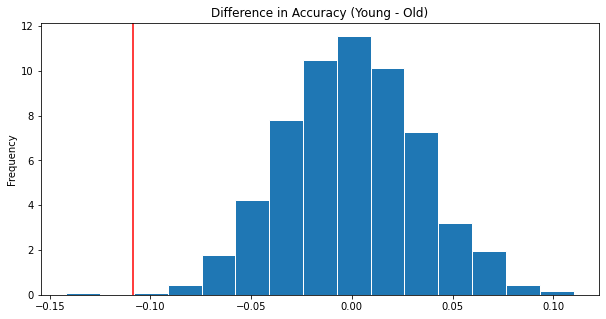

In [35]:
plt.figure(figsize=(10, 5))
pd.Series(diff_scores).plot(kind='hist', ec='w', density=True, bins=15, title='Difference in Accuracy (Young - Old)')
plt.axvline(x=obs, color='red', label='observed difference in accuracy')
(diff_scores <= obs).mean()

In [53]:
# Grid Search for Logistic
#solver, penalty, C
hyper_lr = {
    'log-reg__penalty': ['l1', 'l2'],
    'log-reg__C': np.logspace(-3,3,7),
    'log-reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
model_1 = GridSearchCV(final_pl, param_grid = hyper_lr, scoring='accuracy', cv=5)
model_1.fit(X_train, y_train)
model_1.best_params_
model_1.score(X_train,y_train)

0.608518307721495

In [54]:
model_1.best_params_

{'log-reg__C': 1.0, 'log-reg__penalty': 'l2', 'log-reg__solver': 'sag'}

In [55]:
model_1.score(X_test, y_test)

0.5971550497866287

In [11]:
# Grid Search for SVM
final_pl_2 = Pipeline([
    ('preprocessor', preproc),
    ('svm', SVC(C=1000, gamma=0.1))
])

hyper_svm = {
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svm__C': [0.1, 1, 10, 100, 1000]
}
#model_2 = GridSearchCV(final_pl_2, param_grid = hyper_svm, scoring='accuracy', cv=5)
final_pl_2.fit(X_train, y_train)
#print(model_2.best_params_)
final_pl_2.score(X_train,y_train)

NameError: name 'Pipeline' is not defined

In [62]:
model_2.score(X_test, y_test)

0.6486486486486487

In [60]:
# Grid Search for Random Forest
#max depth, n_estimators, min_sample_split
final_pl_3 = Pipeline([
    ('preprocessor', preproc),
    ('rf', RandomForestClassifier())
])

hyper_rf = {
    'rf__max_depth': np.arange(2, 11, 1),
    'rf__n_estimators': np.arange(10, 201, 10),
    'rf__min_samples_split': np.arange(2, 31, 1)
}
model_3 = GridSearchCV(final_pl_3, param_grid = hyper_rf, scoring='accuracy', cv=5)
model_3.fit(X_train, y_train)
print(model_3.best_params_)
model_3.score(X_train,y_train)

KeyboardInterrupt: 

<BarContainer object of 10 artists>

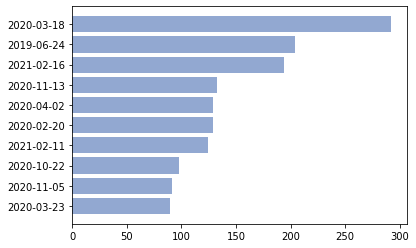

In [15]:
# Gets the dates with the most transactions (instances)
dates = merged['transaction_date'].value_counts().sort_values()[-10:]
plt.barh(dates.index, dates.values, color=['#92A8D1'])

<BarContainer object of 10 artists>

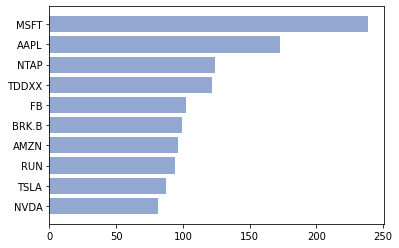

In [16]:
# Gets the tickers that were traded the most
tickers = merged['ticker'].value_counts().sort_values()[-10:]
plt.barh(tickers.index, tickers.values, color = ['#92A8D1'])

<BarContainer object of 10 artists>

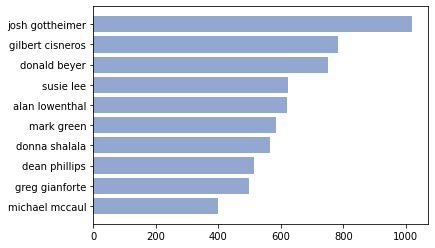

In [17]:
# Gets the reps who made the most transactions
reps = merged['index'].value_counts().sort_values()[-10:]
plt.barh(reps.index, reps.values, color='#92A8D1')

<AxesSubplot:ylabel='ticker'>

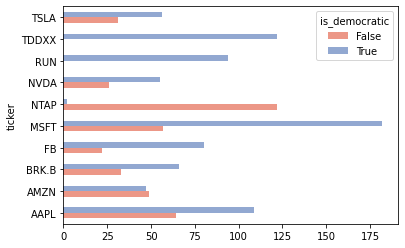

In [18]:
split_ticker = merged[merged['ticker'].isin(tickers.index)].pivot_table(index='ticker', columns='is_democratic', aggfunc='count')['amount_cleaned'].plot(kind='barh', color=['#EC9787', '#92A8D1'])
split_ticker

In [20]:
# Run permutation test

In [21]:
to_shuffle = merged.copy()
amounts_tvd = to_shuffle.pivot_table(index='amount_cleaned', columns='is_democratic', aggfunc='size')
amounts_tvd = amounts_tvd / amounts_tvd.sum()
amounts_tvd
obs_tvd_pre = amounts_tvd.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd_pre

0.31420414740381647

In [22]:
to_shuffle = merged.copy()
tvds = []
for _ in range(500):
    to_shuffle['is_democratic'] = np.random.permutation(merged['is_democratic'])
    pivoted = (
        to_shuffle
        .pivot_table(index='is_democratic', columns='amount_cleaned', aggfunc='size')
        .apply(lambda x: x / x.sum(), axis=1)
    )
    tvd = pivoted.diff().iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)
p_val_perm = (tvds >= obs_tvd_pre).mean()

In [23]:
p_val_perm

0.0

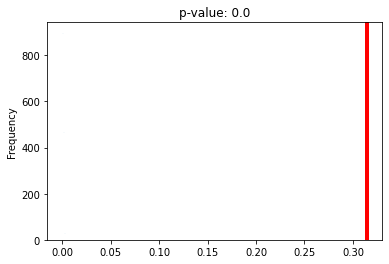

In [24]:
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {p_val_perm}', label='Simulated TVDs')
plt.axvline(x=obs_tvd_pre, color='red', linewidth=4, label='Observed TVD')

In [25]:
# Running permutation tests for missingness to find MAR

In [ ]:
obs_tvd = amount_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd

In [ ]:
pd.Series(tvds_amount).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

In [ ]:
# Given that you are democratic or not, what is the probability that you have a trade that has capital gains of over 200 USD?
merged.pivot_table(index='is_democratic', columns='cap_gains_over_200_usd', aggfunc='size').apply(lambda x: x / x.sum()).plot(kind='bar', color=['#EC9787', '#92A8D1'])

In [ ]:
merged.pivot_table(columns='cap_gains_over_200_usd', index = 'amount_cleaned', aggfunc ='size').apply(lambda x: x / x.sum()).plot(kind='barh', color=['#EC9787', '#92A8D1'])

In [ ]:
merged.pivot_table(index='is_democratic', columns='amount_cleaned', aggfunc='size').apply(lambda x: x / x.sum()).plot(kind='bar')
plt.legend(fontsize=8.75, loc="center left", bbox_to_anchor=(1.04,0.5))

In [ ]:
merged.groupby('is_democratic').count()

In [ ]:
tvds_type = []
for i in range(500):
    test['type'] = np.random.permutation(test['type'])
    pivoted_amount = (
        test
        .pivot_table(index='owner_missing', columns='type', aggfunc='size')
        .apply(lambda x: x / x.sum(), axis=1)
    )
    
    tvd = pivoted_amount.diff().iloc[:, -1].abs().sum() / 2
    tvds_type.append(tvd)
p_val_type = (tvds_type >= obs_tvd_type).mean()
p_val_type

In [ ]:
test = merged.copy()
test['owner_missing'] = test['owner'].isna()
type_dist = test.pivot_table(index='type', columns='owner_missing',aggfunc = 'size')
type_dist = type_dist / type_dist.sum()
type_dist.plot(kind='barh')
type_dist
obs_tvd_type = type_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd_type

In [ ]:
pd.Series(tvds_type).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {p_val_type}', label='Simulated TVDs')
plt.axvline(x=obs_tvd_type, color='red', linewidth=4, label='Observed TVD')
plt.legend();

In [ ]:
test = merged.copy()
test['owner_missing'] = test['owner'].isna()
party_dist = test.pivot_table(index='current_party', columns='owner_missing',aggfunc = 'size')
party_dist = party_dist / party_dist.sum()
party_dist.plot(kind='barh')
party_dist
obs_tvd_party = party_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd_party

In [ ]:
tvds_party = []
for i in range(500):
    test['current_party'] = np.random.permutation(test['current_party'])
    pivoted_party = (
        test
        .pivot_table(index='owner_missing', columns='current_party', aggfunc='size')
        .apply(lambda x: x / x.sum(), axis=1)
    )
    
    tvd = pivoted_party.diff().iloc[:, -1].abs().sum() / 2
    tvds_party.append(tvd)
p_val_party = (tvds_party >= obs_tvd_party).mean()
p_val_party

In [ ]:
obs_tvd_party

In [ ]:
pd.Series(tvds_party).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {p_val_party}', label='Simulated TVDs')
plt.axvline(x=obs_tvd_party, color='red', linewidth=4, label='Observed TVD')
plt.legend();

In [ ]:
# Null: Intuitively, the more a stock is traded,
# the more common it would be to have a trade that has a gain of over 200 USD (capital gains)

In [ ]:
# Null: Intuitively, the more a stock is traded,
# the more common it would be to have a trade that has a gain of over 200 USD (capital gains)
top_10_tickers = merged['ticker'].sort_values().value_counts()[:10].index

In [ ]:
# Looks at the top 10 stocks that were traded, shows that getting over 200 USD in capital gains doesn't depend on ticker
merged[merged['ticker'].isin(top_10_tickers)].pivot_table(index='cap_gains_over_200_usd', columns = 'ticker', aggfunc = 'count')['amount'].plot(kind='bar')

In [ ]:
top_10_tickers_200_usd = merged[merged['cap_gains_over_200_usd'] == True]['ticker'].value_counts()[:10].index

In [ ]:
# Returns how common transactions that made over 200 USD in capital gains actually are, shows that
# it's relatively uncommon and unrelated to stock amount
merged[merged['ticker'].isin(top_10_tickers_200_usd)].pivot_table(index='cap_gains_over_200_usd', columns = 'ticker', aggfunc = 'count')['amount'].plot(kind='bar')

In [ ]:
merged.head()

In [ ]:
# Look at top 10 transaction dates (categories) and look at the amounts traded on each date (categories)

In [ ]:
# Look at top 10 transaction dates (categories) and look at the amounts traded on each date (categories)
top_10_most_trades_dates = merged['transaction_date'].value_counts().sort_values()[-10:].index

In [ ]:
merged[merged['transaction_date'].isin(top_10_most_trades_dates)].pivot_table(index='transaction_date', columns='amount_cleaned', aggfunc = 'count', fill_value=0)['type'].plot(kind='barh', width=0.4, ylabel='Num. of transactions', sort_columns=True)

In [ ]:
# Look into reps. who made the most transactions and then look at the transactions they made

In [ ]:
# Look into reps. who made the most transactions and then look at the transactions they made
top_10_reps_trades = merged['index'].value_counts().sort_values()[-10:].index

<AxesSubplot:ylabel='index'>

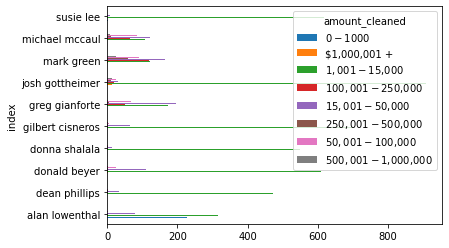

In [53]:
merged[merged['index'].isin(top_10_reps_trades)].pivot_table(index='index', columns='amount_cleaned', aggfunc = 'count', fill_value=0)['type'].plot(kind='barh', width=0.4, ylabel='Num. of transactions', sort_columns=True)

In [30]:
merged.groupby('is_democratic').sem()

,disclosure_year,cap_gains_over_200_usd
is_democratic,,
False,0.009149,0.004277
True,0.006823,0.002234
